In [2]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories


Bad key "text.kerning_factor" on line 4 in
/Users/daminisharma/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import importlib
import helper_functions as fcns
import data_ingest as ing

In [4]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [21]:
pd.set_option('display.max_rows', None)

In [5]:
data_directory = '../data/'
filename = 'APW_race.csv'

df = pd.read_csv(data_directory+filename)

#df = ing.load_prep_data(data_directory+filename)
#df.head(2)

In [25]:
titles = df["title"]
dups = df[titles.isin(titles[titles.duplicated()])].sort_values("title")
    

In [32]:
# for x in dups['url']:
#     print(x)

df_sum = df.loc[:,['title','race']]

In [36]:
data = pd.DataFrame(df_sum.groupby('title')['race'].sum())

In [37]:
data.shape

(2314, 1)

In [18]:
dups = df.duplicated(['title'])

In [22]:
df[dups]

,race,url,title
81,African American,/islandora/object/apw%3A12354880?solr_nav%5Bid...,Because God cares
159,African American,/islandora/object/apw%3A12346380?solr_nav%5Bid...,Chronicles of February
160,African American,/islandora/object/apw%3A12354706?solr_nav%5Bid...,Chronicles of February
165,African American,/islandora/object/apw%3A12346408?solr_nav%5Bid...,Chronicles of July
171,African American,/islandora/object/apw%3A12346361?solr_nav%5Bid...,Chronicles of May
175,African American,/islandora/object/apw%3A12344346?solr_nav%5Bid...,Chronicles of September
622,African American,/islandora/object/apw%3A12354195?solr_nav%5Bid...,The department of corrections or corruptions? ...
787,Asian American,/islandora/object/apw%3A12343994?solr_nav%5Bid...,Are you just as guilty...for ignoring Americas...
788,Asian American,/islandora/object/apw%3A12345431?solr_nav%5Bid...,Beneath the surface (the somm program & the po...
789,Asian American,/islandora/object/apw%3A12345435?solr_nav%5Bid...,Beneathe the surface again (human trafficking:...


In [116]:
data_directory = '../data/'
filename = 'APW_final.csv'
df = ing.load_prep_data(data_directory+filename)
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male


In [117]:
df = ing.agg_groups(df, 'race','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])

In [120]:
df = ing.norm_text(df)

In [8]:
#df = ing.norm_sent(df)

In [121]:
df.groupby('race_agg').size().reset_index(name="count")

,race_agg,count
0,African American,673
1,Latina/o / Hispanic,144
2,Multiracial,201
3,No information,74
4,Other,145
5,White (non-Hispanic),861


In [122]:
df.groupby('gender_agg').size().reset_index(name="count")

,gender_agg,count
0,Female,95
1,Male,1899
2,Other,104


In [ ]:
df.head(2)

# Basic word counts and word cloud

In [14]:
wordCounts = fcns.wordCounter(df['normalized_text'])

In [15]:
wordCounts.head(10)

,word,count
833,prison,15959
162,time,9107
53,year,7478
904,prisoner,6934
80,life,6625
241,inmate,6449
430,state,6414
149,people,6300
1025,have,6135
296,s,5963


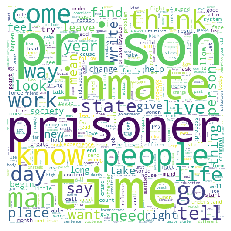

In [16]:
fcns.word_cloud(df['normalized_text'])


# Divergence by race, gender, and states

In [123]:
race_fileids, race_corpora, race_count = fcns.make_group_corpora(df,'race_agg',text_col='normalized_text')
gender_fileids, gender_corpora, gender_count = fcns.make_group_corpora(df,'gender_agg',text_col='normalized_text')
state_fileids, state_corpora, state_count = fcns.make_group_corpora(df,'state',text_col='normalized_text')


['White (non-Hispanic)', 'African American', 'Multiracial', 'Other', 'Latina/o / Hispanic', 'No information']
['Male', 'Other', 'Female']
['California', 'Texas', 'Arizona', 'Pennsylvania', 'New York', 'Missouri', 'Michigan', 'Virginia', 'Massachusetts', 'Florida', 'Indiana', 'Arkansas', 'Illinois', 'North Carolina', 'Georgia', 'Ohio', 'Kentucky', 'Nevada', 'No information', 'Tennessee']


In [124]:
race_count

,race_agg,count
5,White (non-Hispanic),861
0,African American,673
2,Multiracial,201
4,Other,145
1,Latina/o / Hispanic,144
3,No information,74


In [125]:
gender_count

,gender_agg,count
1,Male,1899
2,Other,104
0,Female,95


In [126]:
state_count

,state,count
4,California,393
41,Texas,183
2,Arizona,136
36,Pennsylvania,131
29,New York,116
23,Missouri,82
20,Michigan,82
43,Virginia,64
19,Massachusetts,61
8,Florida,59


## KL Divergence

Divergence Type: KL


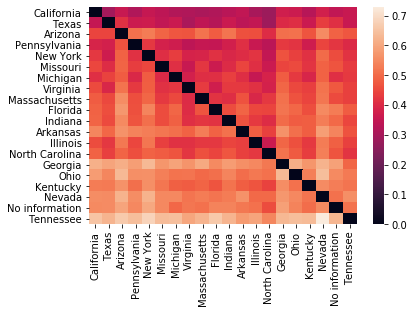

In [127]:
fcns.make_heat_map(state_fileids,state_corpora)

Divergence Type: KL


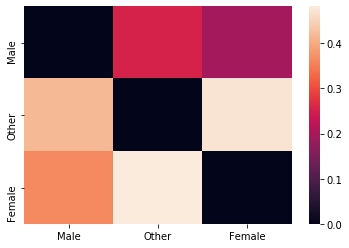

In [128]:
fcns.make_heat_map(gender_fileids,gender_corpora)

Divergence Type: KL


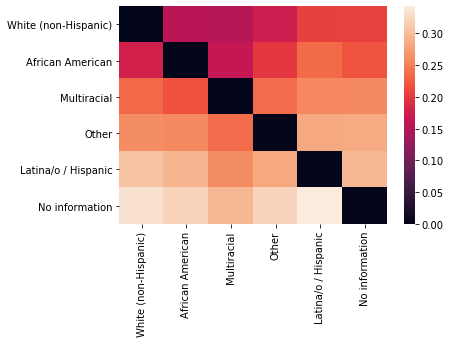

In [129]:
fcns.make_heat_map(race_fileids,race_corpora)

## Wasserstein Divergence

Divergence Type: Wasserstein


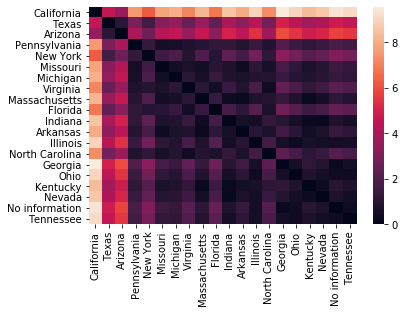

In [130]:
fcns.make_heat_map(state_fileids,state_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


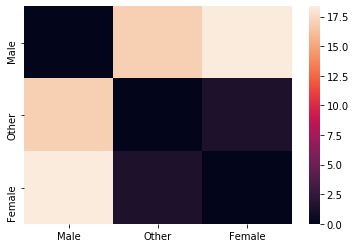

In [131]:
fcns.make_heat_map(gender_fileids,gender_corpora,divergence_type="Wasserstein")

Divergence Type: Wasserstein


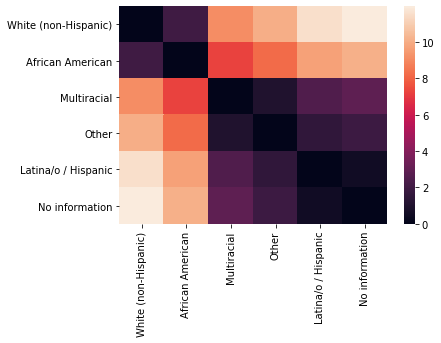

In [132]:
fcns.make_heat_map(race_fileids,race_corpora,divergence_type="Wasserstein")

# KS Divergence

Divergence Type: KS


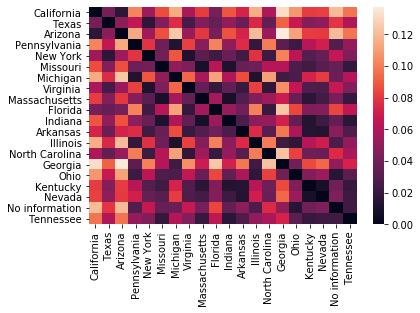

In [133]:
fcns.make_heat_map(state_fileids,state_corpora,divergence_type="KS")


Divergence Type: KS


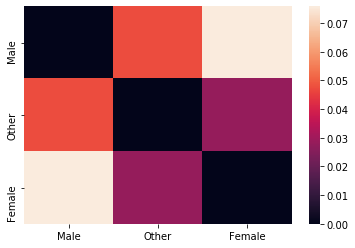

In [134]:
fcns.make_heat_map(gender_fileids,gender_corpora,divergence_type="KS")


Divergence Type: KS


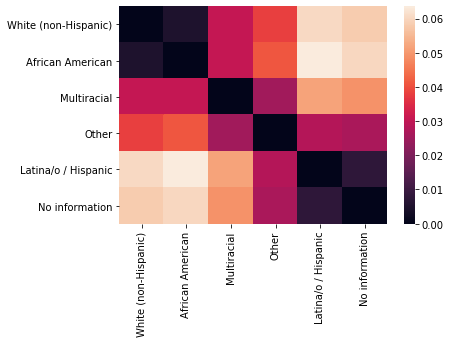

In [135]:
fcns.make_heat_map(race_fileids,race_corpora,divergence_type="KS")

In [136]:
race_fileids

['White (non-Hispanic)',
 'African American',
 'Multiracial',
 'Other',
 'Latina/o / Hispanic',
 'No information']

In [137]:
fcns.Divergence(race_corpora[0],race_corpora[1])

0.15742573448186453

In [138]:
fcns.Divergence(race_corpora[1],race_corpora[0])

0.1783363139253419